## Predicting Car Prices

In this project, we'll use some of the machine learning techniques to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

The dataset can be downloaded directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data), and its information it is extracted from the University of California Irvine's Machine Learning Repository, [here](https://archive.ics.uci.edu/ml/datasets/automobile).

This data set consists of three types of entities:

- the specification of an auto in terms of various characteristics.
- its assigned insurance risk rating.
- its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 

This dataset contains 26 different attributes for 205 instances that can be categorical, integer or real. The task must be performed as a regression one.

### Introduction to the data set

Initially, the data set contains no header, so we will use the columns names as defined by the repository:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
    alfa-romero, audi, bmw, chevrolet, dodge, honda,
    isuzu, jaguar, mazda, mercedes-benz, mercury,
    mitsubishi, nissan, peugot, plymouth, porsche,
    renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [1]:
# Read data set
import pandas as pd
pd.options.display.max_columns = 99

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
print(cars.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fue

In [2]:
# Determine numeric columns to be used as features
print(cars.info())
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols].copy()
print(numeric_cars.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

From this data set, we will take care of the numeric columns of it to perform the predictions. The target column will be `price`.

### Cleaning the data set

We usually can't have any missing values if we want to use them for predictive modeling. 

Based on the data set preview from the last step, we can tell that the `normalized-losses` column contains missing values represented using `"?"`. Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale (min-max normalization) the values in the numeric columns so they all range from 0 to 1.

In [3]:
# Replace missing values
import numpy as np
numeric_cars.replace(to_replace='?', value=np.nan, inplace=True)
print(numeric_cars.head())

  normalized-losses  wheel-base  length  width  height  curb-weight  \
0               NaN        88.6   168.8   64.1    48.8         2548   
1               NaN        88.6   168.8   64.1    48.8         2548   
2               NaN        94.5   171.2   65.5    52.4         2823   
3               164        99.8   176.6   66.2    54.3         2337   
4               164        99.4   176.6   66.4    54.3         2824   

   engine-size  bore stroke  compression-rate horsepower peak-rpm  city-mpg  \
0          130  3.47   2.68               9.0        111     5000        21   
1          130  3.47   2.68               9.0        111     5000        21   
2          152  2.68   3.47               9.0        154     5000        19   
3          109  3.19   3.40              10.0        102     5500        24   
4          136  3.19   3.40               8.0        115     5500        18   

   highway-mpg  price  
0           27  13495  
1           27  16500  
2           26  16500  
3 

In [4]:
# Check and convert numeric columns
print('Before:', numeric_cars.dtypes, sep='\n')
numeric_cars = numeric_cars.astype('float', copy=False)
print('After:', numeric_cars.dtypes, sep='\n')

Before:
normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object
After:
normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object


In [5]:
# Check missing values
print('Previous missing values:', (numeric_cars.isnull()).sum(), sep='\n')

Previous missing values:
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [6]:
# Handle missing values
numeric_cars = numeric_cars.dropna(subset=['price']) # Remove missing price value rows, as we need the actual price as target
numeric_cars = numeric_cars.fillna(numeric_cars.mean()) # Replace all missing values with the column means
print('Late missing values:', (numeric_cars.isnull()).sum(), sep='\n')

Late missing values:
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [7]:
# Normalize numeric columns except target column
price_col = numeric_cars['price'].copy()
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
print(numeric_cars.head())

   normalized-losses  wheel-base    length     width    height  curb-weight  \
0           0.298429    0.058309  0.413433  0.324786  0.083333     0.411171   
1           0.298429    0.058309  0.413433  0.324786  0.083333     0.411171   
2           0.298429    0.230321  0.449254  0.444444  0.383333     0.517843   
3           0.518325    0.384840  0.529851  0.504274  0.541667     0.329325   
4           0.518325    0.373178  0.529851  0.521368  0.541667     0.518231   

   engine-size      bore    stroke  compression-rate  horsepower  peak-rpm  \
0     0.260377  0.664286  0.290476            0.1250    0.294393  0.346939   
1     0.260377  0.664286  0.290476            0.1250    0.294393  0.346939   
2     0.343396  0.100000  0.666667            0.1250    0.495327  0.346939   
3     0.181132  0.464286  0.633333            0.1875    0.252336  0.551020   
4     0.283019  0.464286  0.633333            0.0625    0.313084  0.551020   

   city-mpg  highway-mpg    price  
0  0.222222     0.28

### Creating a univariate simple model using k-nearest neighbors algorithm

Let's start with some univariate `k-nearest neighbors` models. Starting with simple models before moving to more complex models helps us structure the code workflow and understand the features better.

In [8]:
def knn_train_test(train_column, target_column, dataset):
    """
    This function performs the training and simple validation process with k-nearest neighbors algorithm and default k value.
    It implements a simple 50/50 split.
    
    Inputs:
        training column name, target column name, and the dataframe object
    Output:
        RMSE (root-mean-square error) metric
    """
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    
    # Randomize order of rows in data frame
    np.random.seed(1) # Fixed random seed for reproducibility reasons
    shuffled_index = np.random.permutation(dataset.index)
    dataset = dataset.reindex(shuffled_index)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    split = int(len(dataset)/2)
    train_ds = dataset[:split].copy()
    test_ds = dataset[split:].copy()
    
    # Fit a KNN model using default k value
    model = KNeighborsRegressor()
    model.fit(train_ds[[train_column]], train_ds[target_column])
    
    # Make predictions using model
    predictions = model.predict(test_ds[[train_column]])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_ds[target_column], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [9]:
# Use function to evaluate the model with different numeric columns
columns = numeric_cars.columns.tolist()
columns.remove('price')
rmses = dict()
for col in columns:
    rmse = knn_train_test(col, 'price', numeric_cars)
    rmses[col] = rmse

# Create Series from dictionary to clarify results
rmse_results_series = pd.Series(rmses)
print('RMSE results for each column (default k value):', rmse_results_series.sort_values(), sep='\n')

RMSE results for each column (default k value):
engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64


In [10]:
def knn_train_test(train_column, target_column, dataset, k_value):
    """
    This function performs the training and simple validation process with k-nearest neighbors algorithm and a given k value.
    It implements a simple 50/50 split.
    
    Inputs:
        training column name, target column name, the dataframe object, and k value for k-nearest neighbors algorithm
    Output:
        RMSE (root-mean-square error) metric
    """
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    
    # Randomize order of rows in data frame
    np.random.seed(1) # Fixed random seed for reproducibility reasons
    shuffled_index = np.random.permutation(dataset.index)
    dataset = dataset.reindex(shuffled_index)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    split = int(len(dataset)/2)
    train_ds = dataset[:split].copy()
    test_ds = dataset[split:].copy()
    
    # Fit a KNN model using given k value
    model = KNeighborsRegressor(n_neighbors=k_value)
    model.fit(train_ds[[train_column]], train_ds[target_column])
    
    # Make predictions using model
    predictions = model.predict(test_ds[[train_column]])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_ds[target_column], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [11]:
# Use function to evaluate the model with different numeric columns
columns = numeric_cars.columns.tolist()
columns.remove('price')
k_values = [1, 3, 5, 7, 9]
rmses = dict()
for col in columns:
    k_rmses = dict()
    for k in k_values:
        rmse = knn_train_test(col, 'price', numeric_cars, k)
        k_rmses[k] = rmse
    rmses[col] = k_rmses

print('RMSE results for each column per k value used:', rmses, sep='\n')

RMSE results for each column per k value used:
{'width': {1: 4559.257297950061, 3: 4606.413692169901, 9: 4652.914172067787, 5: 4704.482589704386, 7: 4571.485046194653}, 'compression-rate': {1: 8087.205346523092, 3: 7375.063685578359, 9: 7024.485525463435, 5: 6610.812153159129, 7: 6732.801282941515}, 'normalized-losses': {1: 7846.750605148984, 3: 7500.5698123109905, 9: 7688.096096891432, 5: 7330.197653434445, 7: 7756.421586234123}, 'highway-mpg': {1: 6025.594966720739, 3: 4617.305019788554, 9: 5278.358056953987, 5: 4630.026798588056, 7: 4796.061440186946}, 'engine-size': {1: 3258.4861059962027, 3: 2840.562805643501, 9: 3831.8244149840766, 5: 3238.4628296477176, 7: 3563.086774256415}, 'stroke': {1: 9116.495955406906, 3: 7338.68466990294, 9: 7735.554366079291, 5: 8006.529544647101, 7: 7803.937796804327}, 'curb-weight': {1: 5264.290230758878, 3: 5022.318011757233, 9: 4632.044474454401, 5: 4401.118254793124, 7: 4330.608104418053}, 'city-mpg': {1: 5901.143574354764, 3: 4646.746408727155, 9: 

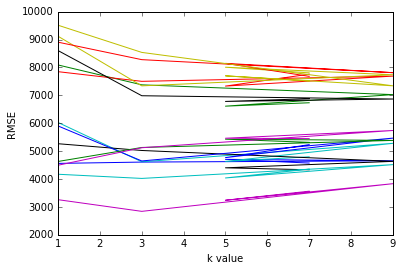

In [12]:
# Visualize RMSE results
import matplotlib.pyplot as plt
%matplotlib inline

for key, value in rmses.items():
    x = list(value.keys())
    y = list(value.values())

    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

### Creating a multivariate model using k-nearest neighbors algorithm

Let's modify inputs to the `knn_train_test()` function we wrote in the last step to work with multiple columns.

In [13]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in rmses.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [16]:
# Select best features
sorted_features = sorted_series_avg_rmse.index
two_features = list(sorted_features[:2])
three_features = list(sorted_features[:3])
four_features = list(sorted_features[:4])
five_features = list(sorted_features[:5])
complete_features = [two_features, three_features, four_features, five_features]
print('Complete best features:', complete_features, sep='\n')

Complete best features:
[['engine-size', 'horsepower'], ['engine-size', 'horsepower', 'width'], ['engine-size', 'horsepower', 'width', 'curb-weight'], ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg']]


In [17]:
def knn_train_test(train_columns, target_column, dataset, k_value):
    """
    This function performs the training and simple validation process with k-nearest neighbors algorithm and a given k value.
    It implements a simple 50/50 split.
    
    Inputs:
        training columns names as a list, target column name, the dataframe object, and k value for k-nearest neighbors algorithm
    Output:
        RMSE (root-mean-square error) metric
    """
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    
    # Randomize order of rows in data frame
    np.random.seed(1) # Fixed random seed for reproducibility reasons
    shuffled_index = np.random.permutation(dataset.index)
    dataset = dataset.reindex(shuffled_index)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    split = int(len(dataset)/2)
    train_ds = dataset[:split].copy()
    test_ds = dataset[split:].copy()
    
    # Fit a KNN model using given k value
    model = KNeighborsRegressor(n_neighbors=k_value)
    model.fit(train_ds[train_columns], train_ds[target_column])
    
    # Make predictions using model
    predictions = model.predict(test_ds[train_columns])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_ds[target_column], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [18]:
# Compute rmse values for each of the grouped features
rmses = dict()
for group_features in complete_features:
    nr_features = str(len(group_features)) + ' features'
    rmse = knn_train_test(group_features, 'price', numeric_cars, 5)
    rmses[nr_features] = rmse

# Create Series from dictionary to clarify results
rmses_results = pd.Series(rmses)
print('RMSE results for each column (default k value) by Nr of used features:', rmses_results.sort_values(), sep='\n')

RMSE results for each column (default k value) by Nr of used features:
2 features    2949.881728
5 features    3410.217013
4 features    3487.340917
3 features    3580.737665
dtype: float64


### Optimizing the model through hyperparameter tuning

Let's now optimize the models that performed the best in the previous step. We'll use 25 k values in steps of 1 to search the optimal value to use.

In [19]:
# Compute rmse values for different k values
k_values = [i for i in range(1, 26)]
rmses = dict()
for group_features in complete_features:
    k_rmses = dict()
    nr_features = str(len(group_features)) + ' features'
    for k in k_values:
        rmse = knn_train_test(group_features, 'price', numeric_cars, k)
        k_rmses[k] = rmse
    rmses[nr_features] = k_rmses

print('RMSE results for each column per k value used:', rmses, sep='\n')

RMSE results for each column per k value used:
{'2 features': {1: 2783.6204237227344, 2: 2657.7963807419765, 3: 2792.586573031673, 4: 2891.5329686923255, 5: 2949.8817277180374, 6: 3096.402601694776, 7: 3164.681969020496, 8: 3413.228359192009, 9: 3748.6716603306486, 10: 4080.7125057341937, 11: 4215.6372280600335, 12: 4275.421524277872, 13: 4373.901683035496, 14: 4424.285137239815, 15: 4539.505493095937, 16: 4667.307671446768, 17: 4729.605305844226, 18: 4790.556632159094, 19: 4824.3866193292615, 20: 4840.850914693829, 21: 4837.429062000271, 22: 4831.16988267597, 23: 4861.679492959275, 24: 4903.346008862579, 25: 4955.892429427362}, '5 features': {1: 2824.7061233282866, 2: 2915.6731645496975, 3: 3012.4204546509704, 4: 3202.8876051367483, 5: 3410.2170133901805, 6: 3618.4509432660384, 7: 3622.6290209234803, 8: 3848.635835654326, 9: 3977.8149139381726, 10: 3994.8132211260104, 11: 4159.843526607947, 12: 4294.3389473154875, 13: 4380.848359486949, 14: 4466.368754416089, 15: 4522.420711094978, 16

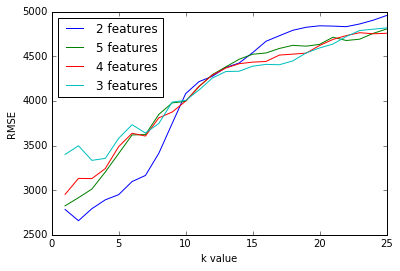

In [20]:
# Visualize results
for k,v in rmses.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='upper left')

As per the results, we can see that, overall, the best model is obtained with the 2 best features: `'engine-size'` and `'horsepower'` and a value of `k = 2`.
